In [130]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import pandas as pd

In [131]:
cust_df=pd.read_csv("new_data.csv")
cust_df.head()

,Gender,Age,Annual_Income,Spending_Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [132]:
cust_df=cust_df.drop('Gender', axis=1)
cust_df.head()

,Age,Annual_Income,Spending_Score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [133]:
cust_df['Age'] = cust_df['Age'].astype(int)

In [134]:
from sklearn.preprocessing import StandardScaler
x=cust_df.values[:,1:]
x=np.nan_to_num(x)
clus_datase=StandardScaler().fit_transform(x)
clus_datase

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

In [135]:
clusterNum =3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(x)
labels = k_means.labels_
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2]


In [136]:
cust_df["clus_km"]=labels
cust_df.head(5)

,Age,Annual_Income,Spending_Score,clus_km
0,19,15,39,0
1,21,15,81,0
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [137]:
cust_df.groupby('clus_km').mean()

,Age,Annual_Income,Spending_Score
clus_km,,,
0,40.325203,44.154472,49.829268
1,40.394737,87.000000,18.631579
2,32.692308,86.538462,82.128205


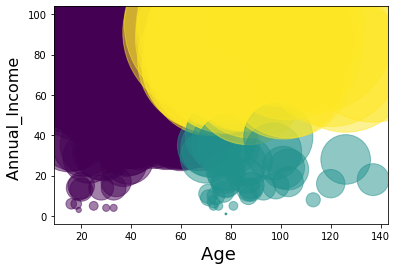

In [147]:
area=np.pi * ( x[:,1]) **2
plt.scatter(x[:,0], x[:,1], s=area, c=labels.astype(np.float_), alpha=0.5)
plt.xlabel("Age ", fontsize=18)
plt.ylabel("Annual_Income ", fontsize=16)
plt.show()

/tmp/ipykernel_5968/1512036843.py:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)


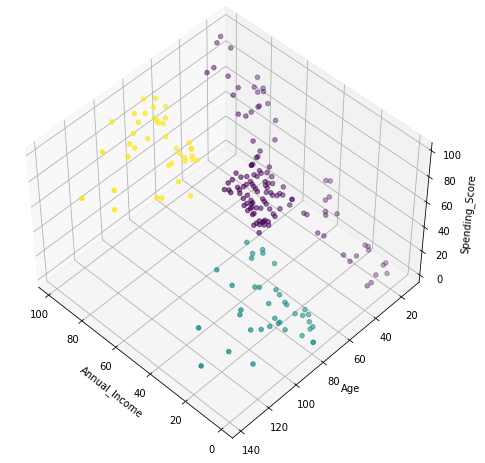

In [153]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()

ax.set_xlabel('Annual_Income')
ax.set_ylabel('Age')
ax.set_zlabel('Spending_Score')

ax.scatter(x[:, 1], x[:, 0], x[:, 1], c= labels.astype(float))

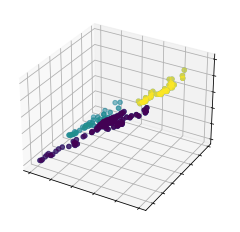

In [160]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.scatter(x[:,1], x[:,0], x[:,1],)

ax.set(xticklabels=[],
       yticklabels=[],
       zticklabels=[])

ax.scatter(x[:,1], x[:,0], x[:,1], c=labels.astype(np.float_))